In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
with open ("output.log") as f:
    data_lines = f.readlines()[1::2]
clean_data = [word.rstrip().lstrip().split(":")  for data_line in data_lines for word in data_line.split('\t') if word != '']
clean_data

[['iter', ' 660'],
 ['time per iter', ' 0.0644'],
 ['Epoch time', ' 42.48'],
 ['average_loss',
  ' [0.6568879304954582, 0.6321861231151749, 0.6884848389043111, 0.6927145187441073, 0.6772566668968854, 0.6693965567922106, 0.6536320192806411, 0.7025713484548436, 0.6984161678906325, 0.682974864876001]'],
 ['average_reward',
  ' [0.010432485463794446, -0.06512012019574756, 0.08199753975981808, 0.019609525558002057, 0.021789690176290837, 0.12217573257701053, 0.11950912362547526, 0.05334015595649454, -0.009292094635788499, -0.059606721097694645]'],
 ['iter', ' 381'],
 ['time per iter', ' 0.0992'],
 ['Epoch time', ' 37.79'],
 ['average_loss',
  ' [0.49313423, 0.5003087, 0.5003567, 0.49753445, 0.50602, 0.4856766, 0.48356813, 0.49642, 0.4843324, 0.51364046]'],
 ['average_reward',
  ' [0.40453757691811526, 0.3724192136046285, 0.5354055901522666, 0.6126441488223607, 0.6477006086585766, 0.6211641131524853, 0.41578636564280586, 0.4238466193267909, 0.5832182886490874, 0.5183916707605147]'],
 ['iter',

In [99]:

loss_data_dict = {key:[] for key in dict(clean_data).keys()}
loss_data_dict

{'iter': [],
 'time per iter': [],
 'Epoch time': [],
 'average_loss': [],
 'average_reward': []}

In [100]:
for i in range(0,len(clean_data),len(loss_data_dict)):
    for j in range(len(loss_data_dict)):
        k = clean_data[i+j][0]
        v = clean_data[i+j][1]
        v = v.replace('nan', 'np.nan')

        eval_v = eval(v)
            
        loss_data_dict[k].append(eval_v)

robot_count = len(loss_data_dict['average_loss'][0])
epochs_range = len(loss_data_dict['iter'])
loss_data_dict['average_loss'] = np.array(loss_data_dict['average_loss'])
loss_data_dict['average_reward'] = np.array(loss_data_dict['average_reward'])

In [101]:
loss_data_dict['average_loss'].shape

(99, 10)

In [102]:
rows = 5
cols = 2

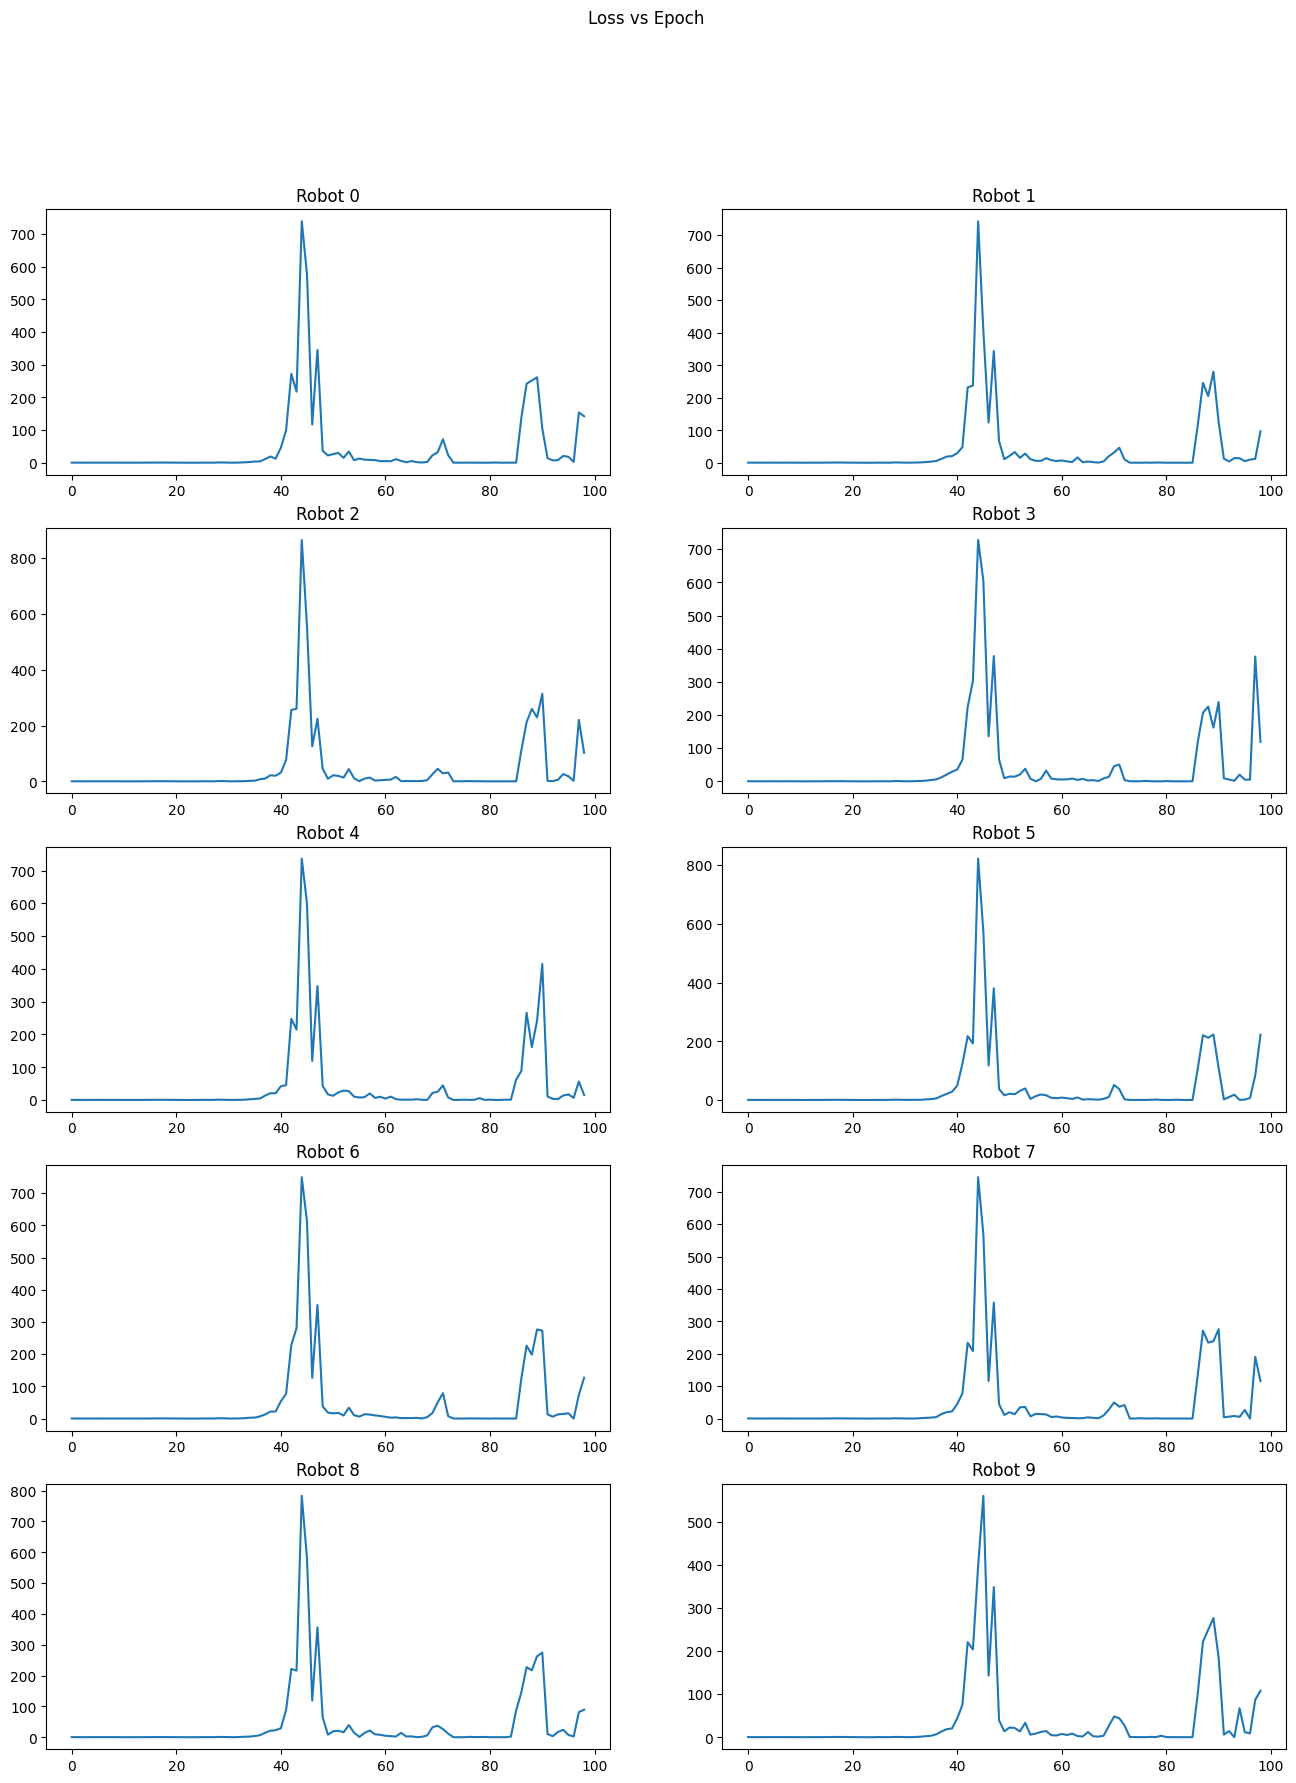

In [103]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(16,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_loss'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Loss vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()


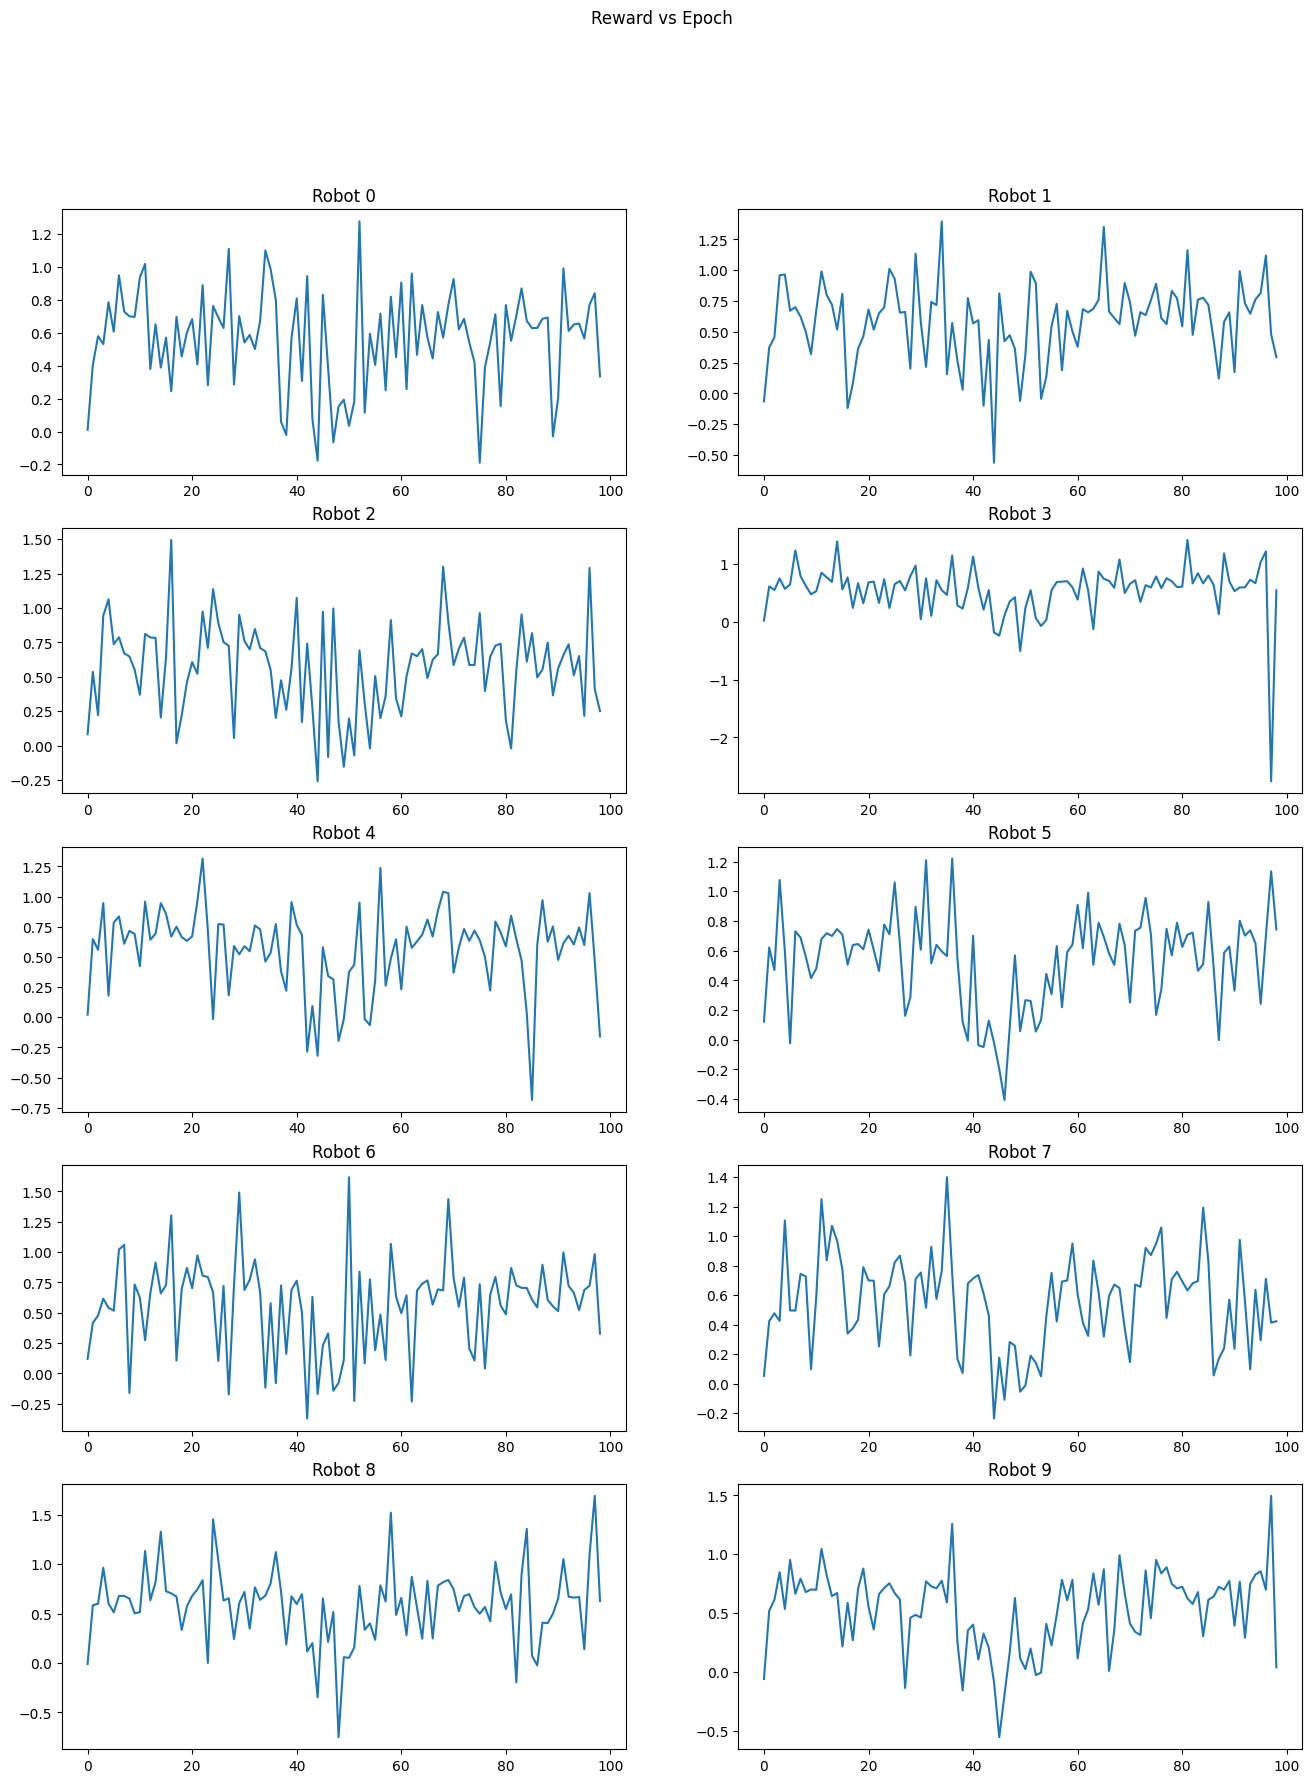

In [104]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(16,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_reward'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Reward vs Epoch')
plt.savefig("4_robot_reward.png")
plt.show()

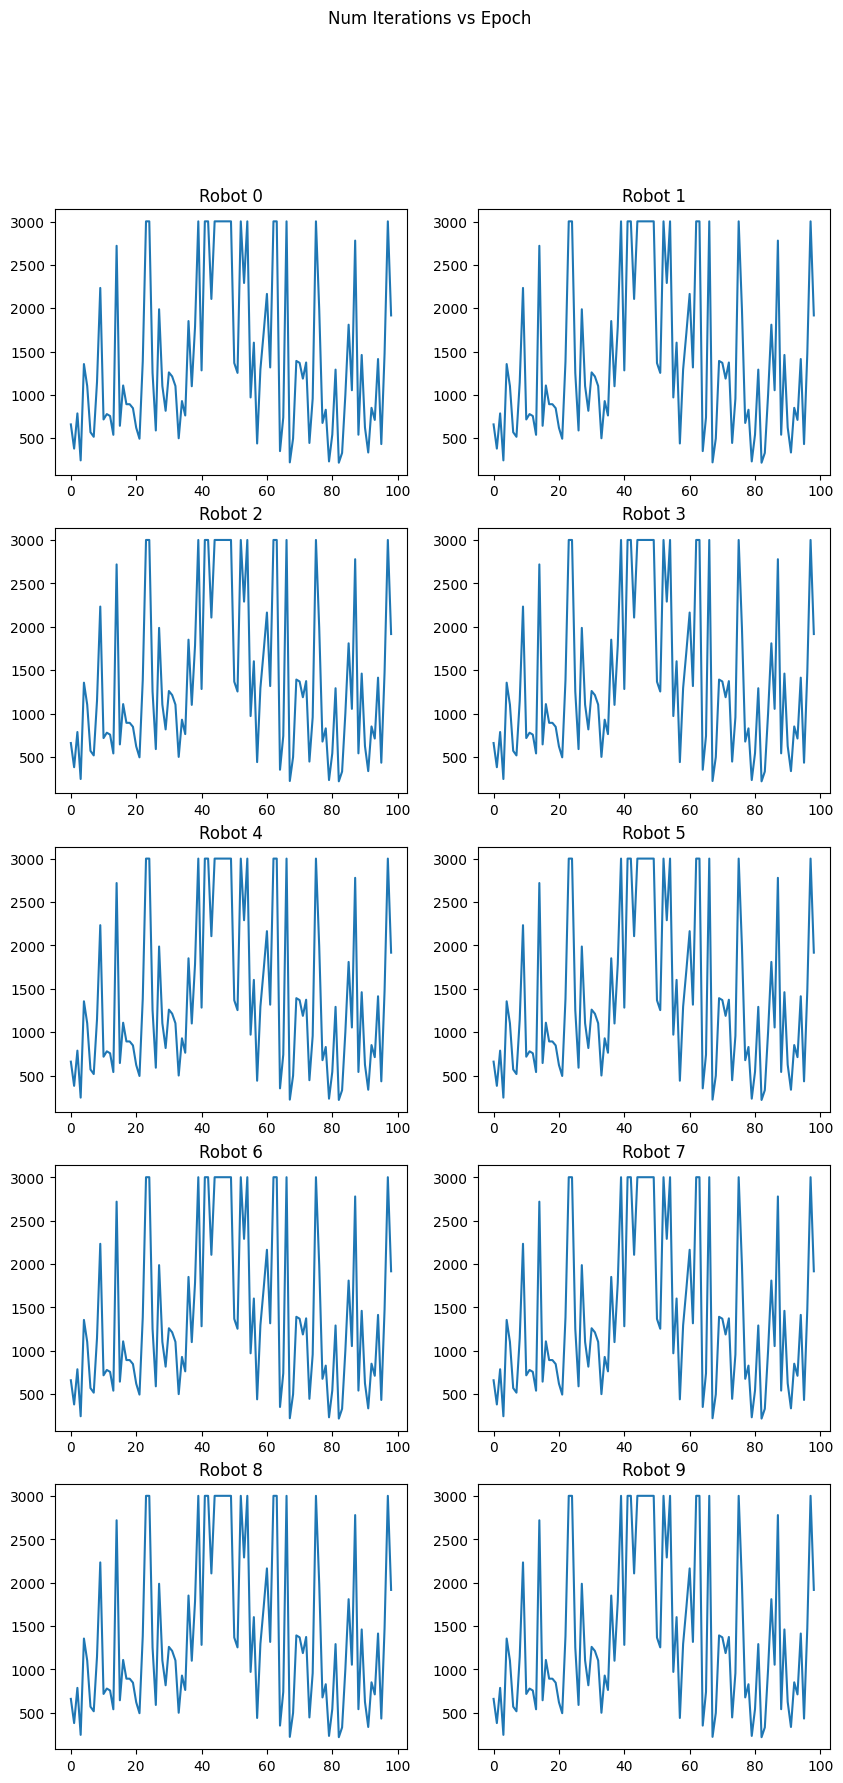

In [105]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['iter'][:])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Num Iterations vs Epoch')
plt.savefig("4_robot_iter.png")
plt.show()

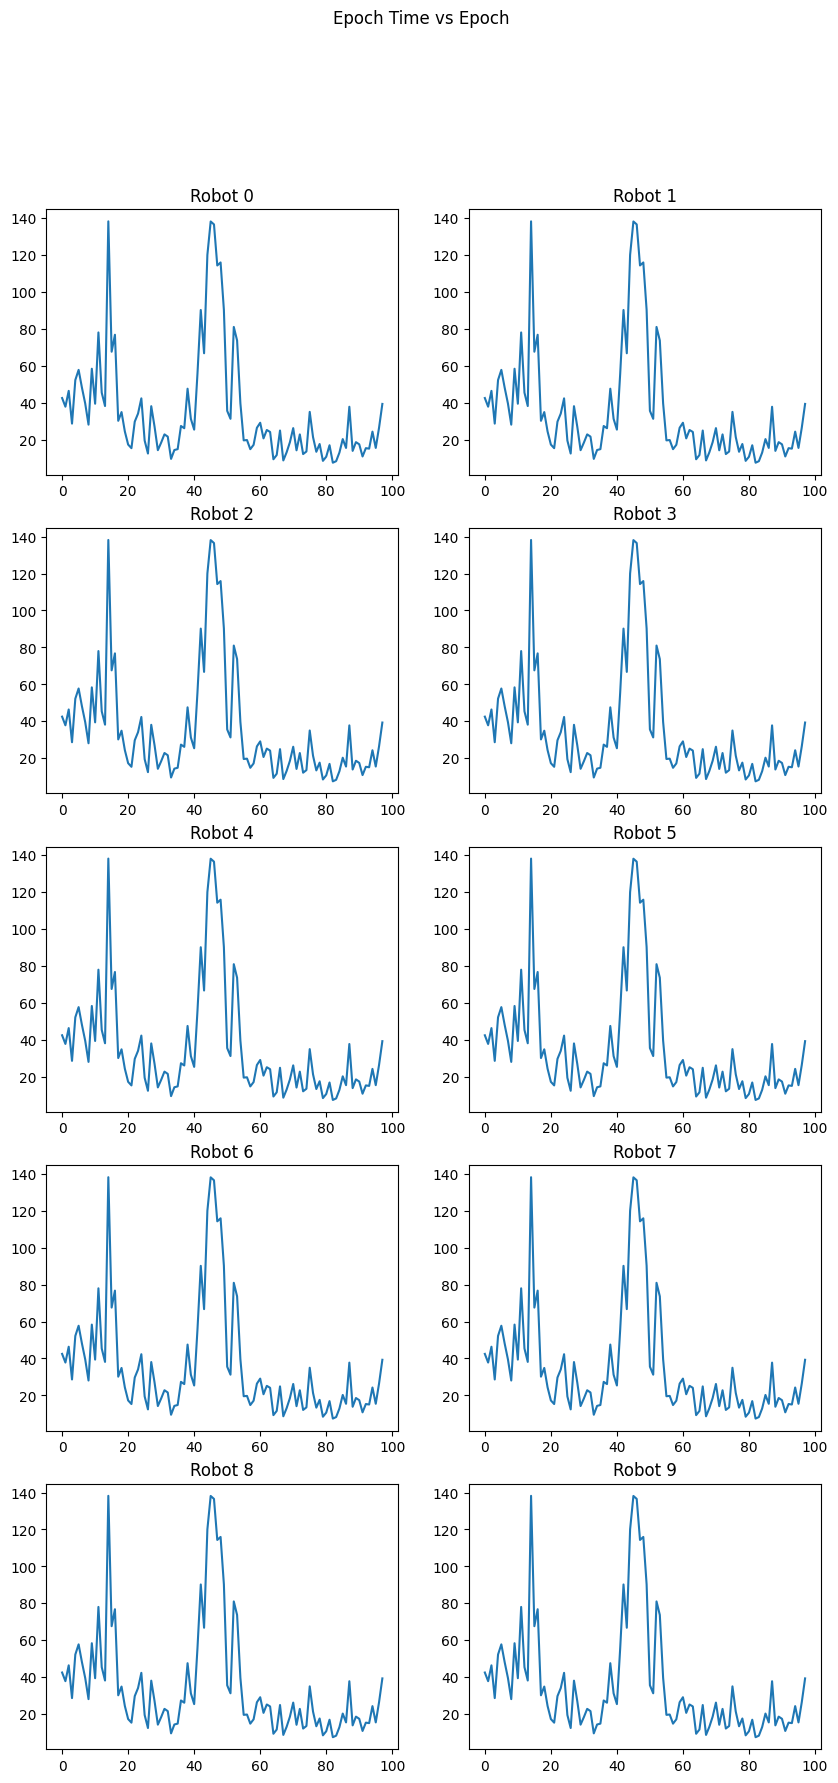

In [106]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:-1],loss_data_dict['Epoch time'][:-1])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Epoch Time vs Epoch')
plt.savefig("4_robot_time.png")
plt.show()